# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [13]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled[0:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

### Creating a data structure with 60 timesteps and 1 output

In [15]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
print(np.array_str(X_train[0:3,0:10], precision=5, suppress_small=True))

[[0.08581 0.09701 0.09433 0.09156 0.07984 0.06433 0.05854 0.06569 0.06109
  0.06639]
 [0.09701 0.09433 0.09156 0.07984 0.06433 0.05854 0.06569 0.06109 0.06639
  0.06143]
 [0.09433 0.09156 0.07984 0.06433 0.05854 0.06569 0.06109 0.06639 0.06143
  0.07475]]


### Reshaping

In [17]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape

(1198, 60, 1)

In [19]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Initialising the RNN

In [21]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [22]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [25]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [26]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [37]:
# X_train
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Fitting the RNN to the Training set

In [28]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 20s 17ms/step - loss: 0.0478
Epoch 2/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0050
Epoch 5/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0051
Epoch 8/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0053
Epoch 10/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

1198/1198 [==============================] - 15s 12ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 16s 14ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 18s 15ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 15s 13ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0014


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [32]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price[0:5]

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ]])

### Getting the predicted stock price of 2017

In [33]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [41]:
dataset_train['Open']

0       325.25
1       331.27
2       329.83
3       328.34
4       322.04
         ...  
1253    790.90
1254    790.68
1255    793.70
1256    783.33
1257    782.75
Name: Open, Length: 1258, dtype: float64

In [39]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

### Visualising the results

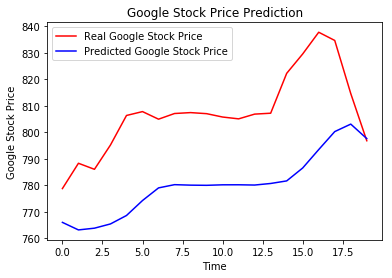

In [34]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()